In [214]:
%matplotlib widget
import os
import shutil
import kagglehub
import pandas as pd
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import plotly.express as px
from pycountry_convert import country_alpha3_to_country_alpha2, country_alpha2_to_continent_code, convert_continent_code_to_continent_name

In [11]:
current_dir = os.getcwd()
downloaded_path = kagglehub.dataset_download("meleknur/global-internet-usage-by-country-2000-2023")
source_path = os.path.join(os.path.dirname(downloaded_path), os.path.basename(downloaded_path))
shutil.move(source_path, current_dir)

100%|█████████████████████████████████████████████████████████████████████████████| 17.2k/17.2k [00:00<00:00, 1.61MB/s]

Extracting files...


Error: Destination path 'C:\Users\Sileo\projects\data_proj\1' already exists

## Import CSV and Assign it to a Dataframe

In [215]:
df = pd.read_csv('1/internet_usage.csv')
df

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,13.8151,18.3758,27.4944,27.4291,27.377,27.3443,27.3326,27.3393,...,50.07,54.8391,59.6083,64.3775,..,..,..,..,..,..
213,West Bank and Gaza,PSE,1.11131,1.83685,3.10009,4.13062,4.4009,16.005,18.41,21.176,...,53.6652,56.7,59.9,63.3,64.4,70.6226,76.01,81.83,88.6469,86.6377
214,"Yemen, Rep.",YEM,0.0825004,0.0908025,0.518796,0.604734,0.881223,1.0486,1.24782,5.01,...,22.55,24.0854,24.5792,26.7184,..,..,13.8152,14.8881,17.6948,..
215,Zambia,ZMB,0.191072,0.23313,0.477751,0.980483,1.1,1.3,1.6,1.9,...,6.5,8.8,10.3,12.2,14.3,18.7,24.4992,26.9505,31.2342,..


In [216]:
df.replace('..', np.nan, inplace = True)
df.iloc[:,2:] = df.iloc[:, 2:].apply(pd.to_numeric)
df.fillna(0, inplace = True)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  217 non-null    object 
 1   Country Code  217 non-null    object 
 2   2000          217 non-null    float64
 3   2001          217 non-null    float64
 4   2002          217 non-null    float64
 5   2003          217 non-null    float64
 6   2004          217 non-null    float64
 7   2005          217 non-null    float64
 8   2006          217 non-null    float64
 9   2007          217 non-null    float64
 10  2008          217 non-null    float64
 11  2009          217 non-null    float64
 12  2010          217 non-null    float64
 13  2011          217 non-null    float64
 14  2012          217 non-null    float64
 15  2013          217 non-null    float64
 16  2014          217 non-null    float64
 17  2015          217 non-null    float64
 18  2016          217 non-null    

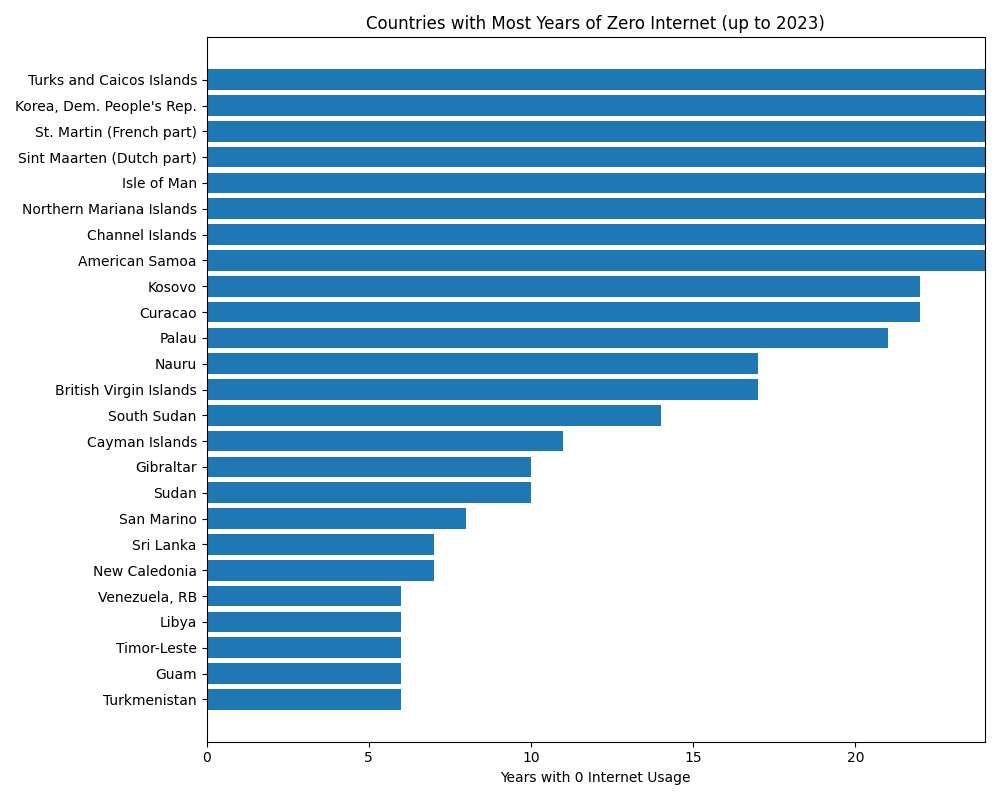

In [218]:
year_cols = [col for col in df.columns if col.isdigit()]
df = df.copy()
country_names = df["Country Name"]
plt.rcParams["font.family"] = "DejaVu Sans"
fig = plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.invert_yaxis()

def animate(i):
    ax.clear()
    current_years = year_cols[:i+1]
    zero_counts = (df[current_years] == 0).sum(axis=1)
    labels = df.loc[zero_counts.sort_values(ascending=False).head(25).index, "Country Name"]
    ax.barh(labels, zero_counts.sort_values(ascending=False).head(25).values)
    ax.set_title(f"Countries with Most Years of Zero Internet (up to {year_cols[i]})")
    ax.set_xlabel("Years with 0 Internet Usage")
    ax.set_xlim(0, len(current_years))  
    ax.invert_yaxis()
    plt.tight_layout()

anim = FuncAnimation(fig, animate, frames=len(year_cols), interval=500, repeat=False)
anim.save("Zeros_over_time.gif", writer="pillow", fps=6, dpi=150)

plt.show()


In [219]:
years = [col for col in df.columns if col.isdigit()]
vert_df = df.melt(id_vars=["Country Name", "Country Code"], 
                  value_vars=years, 
                  var_name="Year", 
                  value_name="Internet Usage")
vert_df["Year"] = vert_df["Year"].astype(int)
vert_df = vert_df[vert_df['Year'] < 2023] 
vert_df.head(10)

,Country Name,Country Code,Year,Internet Usage
0,Afghanistan,AFG,2000,0.000000
1,Albania,ALB,2000,0.114097
2,Algeria,DZA,2000,0.491706
3,American Samoa,ASM,2000,0.000000
4,Andorra,AND,2000,10.538800
5,Angola,AGO,2000,0.105046
6,Antigua and Barbuda,ATG,2000,6.482230
7,Argentina,ARG,2000,7.038680
8,Armenia,ARM,2000,1.300470
9,Aruba,ABW,2000,15.442800


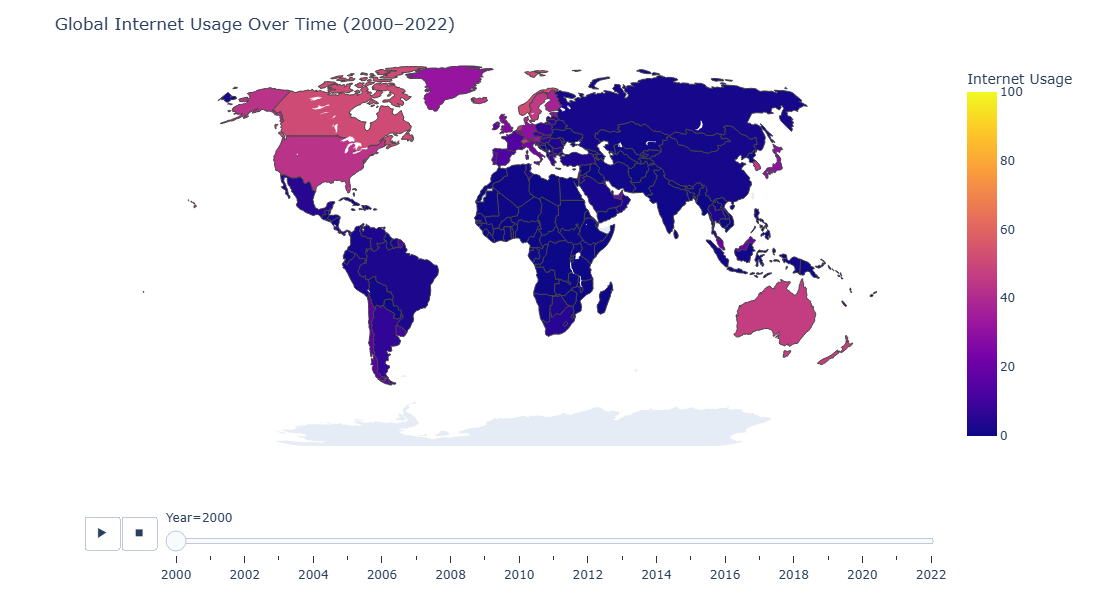

In [220]:
vert_df["Internet Usage"] = pd.to_numeric(vert_df["Internet Usage"], errors="coerce")

fig = px.choropleth(
    vert_df,
    locations="Country Code",
    color="Internet Usage",
    hover_name="Country Name",
    animation_frame="Year",
    color_continuous_scale="Plasma",  
    range_color=(0, 100)
)

fig.update_layout(
    title="Global Internet Usage Over Time (2000–2022)",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type="natural earth",
        lataxis_range=[-90, 90],
        lonaxis_range=[-180, 180]
    ),
    autosize=False,
    width=1000,
    height=600
)
fig.write_html("internet_usage_map.html")
fig.show()


In [221]:
processed_df = processed_df[processed_df['NaN Count'] < 10]

In [222]:
vert_df.fillna(0, inplace = True)
vert_df

,Country Name,Country Code,Year,Internet Usage
0,Afghanistan,AFG,2000,0.000000
1,Albania,ALB,2000,0.114097
2,Algeria,DZA,2000,0.491706
3,American Samoa,ASM,2000,0.000000
4,Andorra,AND,2000,10.538800
...,...,...,...,...
4986,Virgin Islands (U.S.),VIR,2022,0.000000
4987,West Bank and Gaza,PSE,2022,88.646900
4988,"Yemen, Rep.",YEM,2022,17.694800
4989,Zambia,ZMB,2022,31.234200


In [247]:
## Example Implementation can be found here: https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry
def code_to_continent(alpha3):
    try:
        alpha2 = country_alpha3_to_country_alpha2(alpha3)
        continent_code = country_alpha2_to_continent_code(alpha2)
        return convert_continent_code_to_continent_name(continent_code)
    except:
        print(alpha3)
        return "Unknown"
custom_region_map = {
    "Channel Islands": "Europe",
    "Kosovo": "Europe",
    "Sint Maarten (Dutch part)": "North America",
    "Timor-Leste": "Asia",
}
vert_df["Region"] = vert_df.apply(
    lambda row: custom_region_map.get(row["Country Name"]) or code_to_continent(row["Country Code"]),
    axis=1
)

In [250]:
vert_df.sort_values(['Country Name', 'Country Code'], inplace = True)
yoy_by_region = vert_df.groupby(['Region', 'Year'])["Internet Usage"].sum().reset_index()

In [262]:
yoy_by_region.head(25)

,Region,Year,Internet Usage,YOY (%)
0,Africa,2000,44.901559,NaN
1,Africa,2001,61.949751,37.967930
2,Africa,2002,84.126297,35.797636
3,Africa,2003,106.574957,26.684474
4,Africa,2004,157.434399,47.721757
5,Africa,2005,180.361755,14.563117
6,Africa,2006,215.785349,19.640302
7,Africa,2007,263.572234,22.145565
8,Africa,2008,316.284090,19.999017
9,Africa,2009,329.763890,4.261928


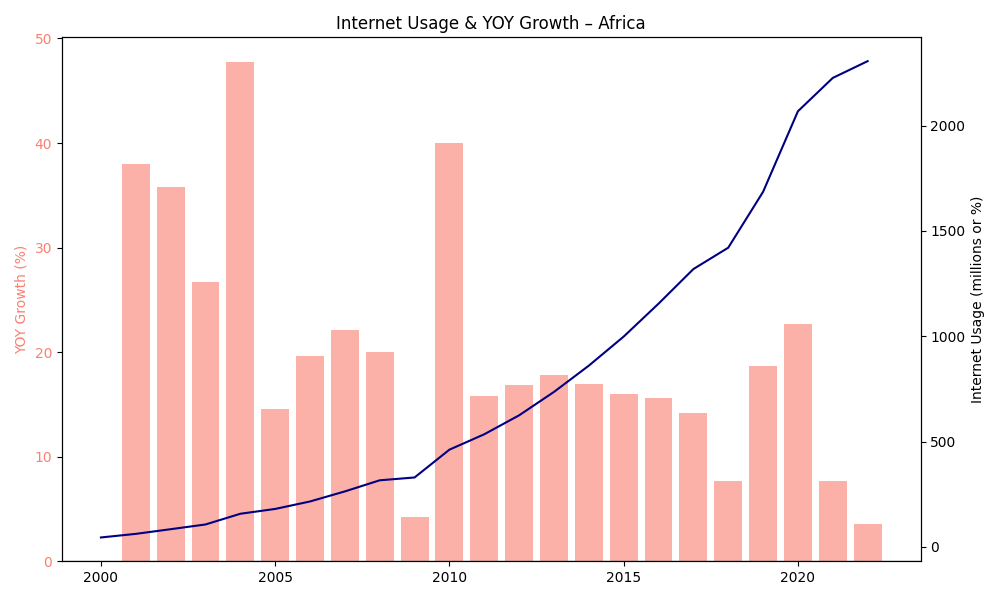

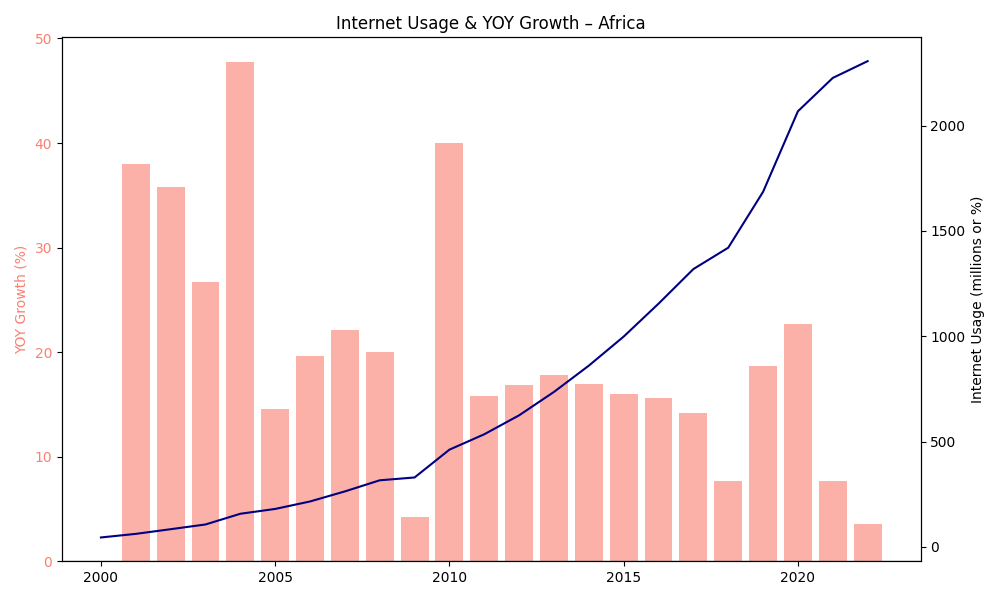

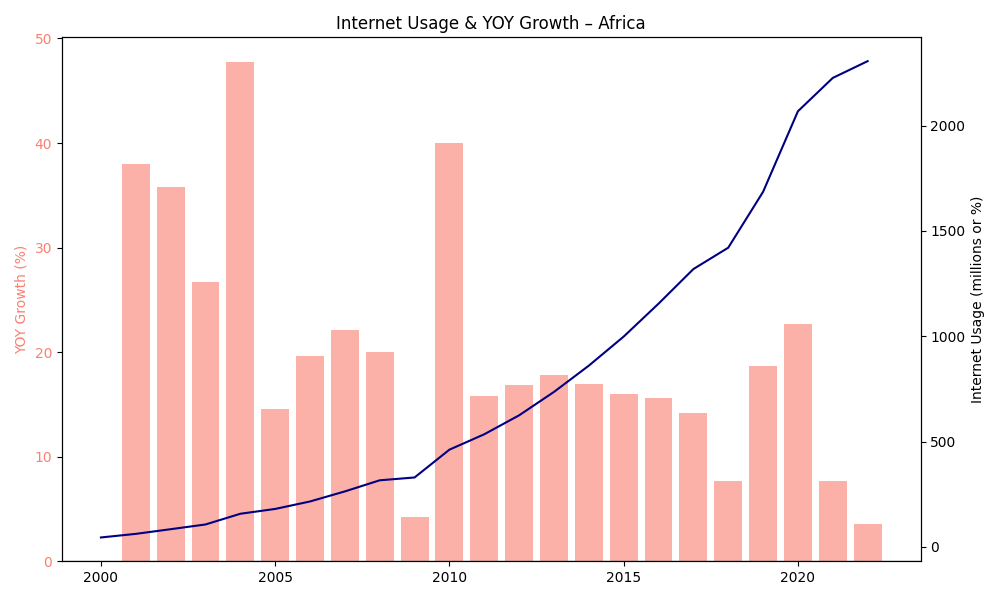

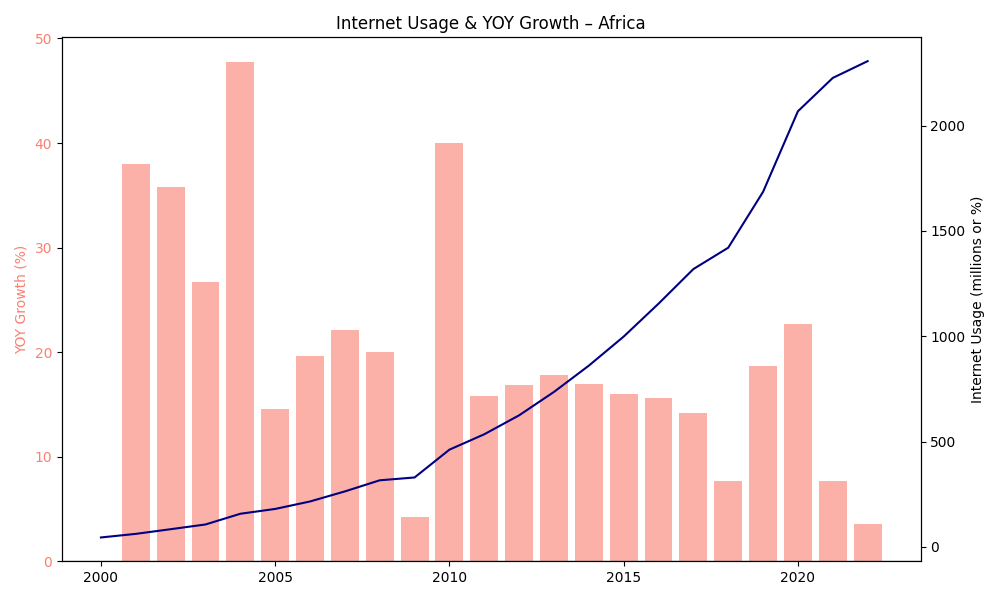

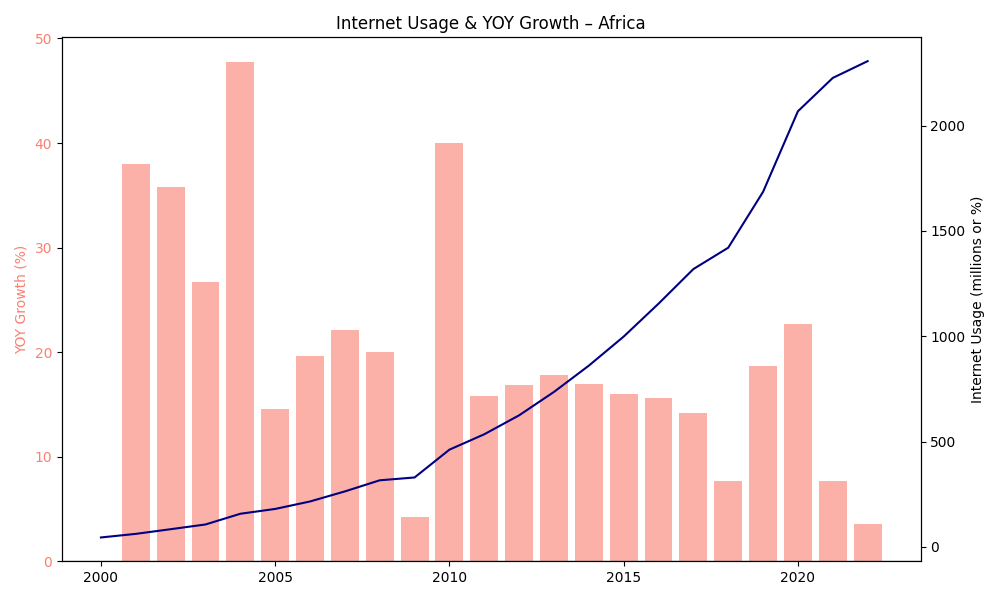

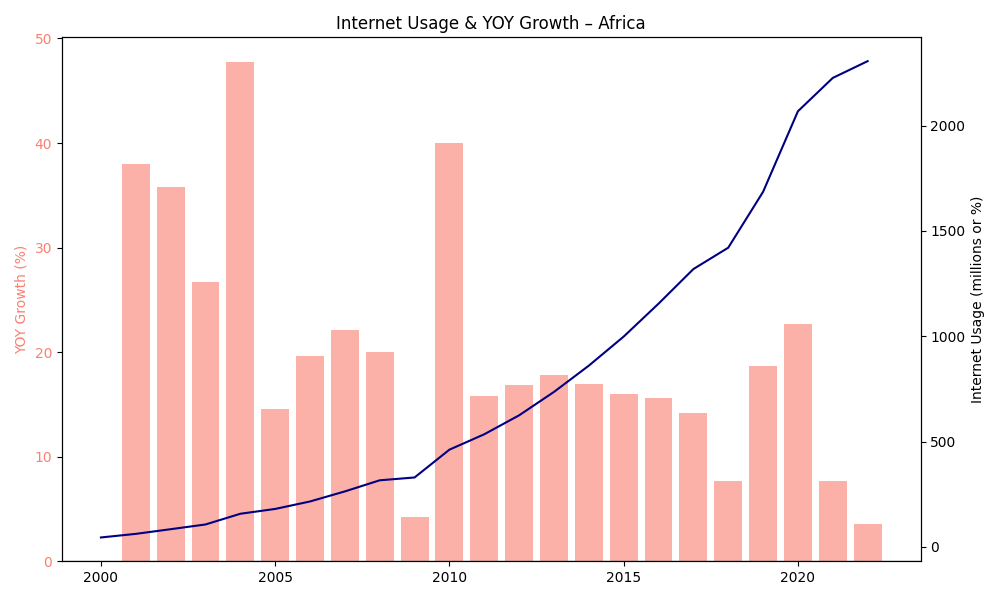

In [269]:
yoy_by_region["YOY (%)"] = yoy_by_region.groupby("Region")["Internet Usage"].pct_change() * 100
region_list = list(yoy_by_region['Region'].unique())
for region in region_list: 
    region_data = yoy_by_region[yoy_by_region["Region"] == region]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(region_data["Year"], region_data["YOY (%)"], color="salmon", alpha=0.61)
    ax1.set_ylabel("YOY Growth (%)", color="salmon")
    ax1.tick_params(axis="y", labelcolor="salmon")
    ax1.axhline(0, color="gray", linewidth=1)
    ax2 = ax1.twinx()
    ax2.plot(region_data["Year"], region_data["Internet Usage"], color="navy")
    ax2.set_ylabel("Internet Usage (millions or %)", color="black")
    plt.title(f"Internet Usage & YOY Growth – {region}")
    plt.tight_layout()
    plt.savefig(f"{region.replace(' ', '_')}_YOY.png", dpi=300)
    plt.close()
    plt.show()